### This is a regression Project where I will be predicting the selling price of car depending upon different factors like:-
1. Company, name
2. Year purchased
3. Kilometers driven since the purchased date
4. Fuel Type

Based on the inputs provided, my model will make a prediction of the ideal selling price for a vehicle. This prediction represents the amount at which the vehicle should be priced for sale.

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("price.xlsx")

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type,Unnamed: 6
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol,NaN
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,NaN
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,NaN
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,NaN
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,NaN


# Understanding the Data

In [4]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type,Unnamed: 6
count,892,892,892,892,843,839,2
unique,525,50,61,276,260,4,1
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol,Ask For Price
freq,13,235,117,33,30,440,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  843 non-null    object
 5   fuel_type   839 non-null    object
 6   Unnamed: 6  2 non-null      object
dtypes: object(7)
memory usage: 48.9+ KB


In [6]:
df.shape

(892, 7)

In [7]:
df.nunique() # uniques values in each column

name          525
company        50
year           61
Price         276
kms_driven    260
fuel_type       4
Unnamed: 6      1
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 6    890
fuel_type      53
kms_driven     49
name            0
company         0
year            0
Price           0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 892, dtype: bool

<hr>
<hr>

# Data Preprocessing
1. unnecessary data 
2. too much trash in the year column
3. the year column in object but it should be integer
4. Price has words in between the integers
5. price column is object and there are commas
6. in kms_driven column there is kms which needs to be removed and there are commas in the column
7. the kms_dricven is object 
8. fuel types has nan values
9. only keep 3 words of the name

In [10]:
df = df.drop("Unnamed: 6", axis=1)

In [11]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
469,Toyota Corolla H2,Toyota,2003,"1,50,000","1,00,000 kms",Petrol
372,Tata Vista Quadrajet VX,Tata,2011,"1,20,000","90,000 kms",Diesel
378,Maruti Suzuki Alto 800,Maruti,2015,"2,19,000","5,000 kms",Petrol
625,Hyundai Verna 1.6 CRDI SX,Hyundai,2018,"8,55,000","42,000 kms",Diesel
89,Hyundai Verna Transform SX VTVT,Hyundai,2008,"1,60,000","45,000 kms",Petrol


In [12]:
df["year"].unique() # To much trash

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 'Tata', 'TOUR', 2003, 'r 15', 2004,
       'Zest', '/-Rs', 'sale', 1995, 'ara)', 2002, 'SELL', 2001, 'tion',
       'odel', '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car',
       'able', 'no.', 'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...',
       'e...', 'D...', ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent',
       '...', 'Sumo', 'cab', 't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [13]:
df["year"].shape

(892,)

In [14]:
df['year'] = df['year'].astype(str)
df = df[df['year'].str.isnumeric()] #Removed all the unnecesssary row with non integer data

In [15]:
df["year"].shape

(844,)

## 3. The year column in object but it should be integer

In [16]:
df["year"] = df["year"].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        844 non-null    object
 1   company     844 non-null    object
 2   year        844 non-null    int32 
 3   Price       844 non-null    object
 4   kms_driven  842 non-null    object
 5   fuel_type   839 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.9+ KB


## 4.Price has words in between the integers

In [18]:
df["Price"].value_counts() # Need to remove this ask for price

Ask For Price    23
2,50,000         16
3,50,000         12
1,30,000         11
1,80,000         11
                 ..
1,88,000          1
6,75,000          1
4,10,000          1
11,50,000         1
2,39,999          1
Name: Price, Length: 274, dtype: int64

In [19]:

df=df[df['Price']!='Ask For Price']

In [20]:
df["Price"].value_counts()

2,50,000    16
3,50,000    12
1,80,000    11
4,00,000    11
1,30,000    11
            ..
1,58,400     1
72500        1
1,88,000     1
6,75,000     1
4,48,000     1
Name: Price, Length: 273, dtype: int64

# 5. price column is object and there are commas

In [21]:
df['Price']=df['Price'].str.replace(',','')

In [22]:
df = df.dropna(subset=['Price'])

In [23]:
df["Price"].isnull().sum() # NOw ther are no nan values 

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 1 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        735 non-null    object
 1   company     735 non-null    object
 2   year        735 non-null    int32 
 3   Price       735 non-null    object
 4   kms_driven  735 non-null    object
 5   fuel_type   732 non-null    object
dtypes: int32(1), object(5)
memory usage: 37.3+ KB


In [25]:
df['Price'] = df['Price'].str.replace(' for sale', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [26]:
df = df.dropna(subset=['Price'])

In [27]:
df["Price"].isnull().sum() # No null values in this columns too

0

In [28]:
df["Price"]=df["Price"].astype(int) # Converted to integer

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        733 non-null    object
 1   company     733 non-null    object
 2   year        733 non-null    int32 
 3   Price       733 non-null    int32 
 4   kms_driven  733 non-null    object
 5   fuel_type   730 non-null    object
dtypes: int32(2), object(4)
memory usage: 34.4+ KB


## 6. In kms_driven column there is kms which needs to be removed and there are commas in the column

In [30]:
df["kms_driven"]

1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
7        25,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 733, dtype: object

In [31]:
df["kms_driven"] = df["kms_driven"].str.split(" ").str.get(0).str.replace(",", "")

In [32]:
df.sample(5) # Borth commas and the kms has been rmoved form the column

,name,company,year,Price,kms_driven,fuel_type
264,Maruti Suzuki Ritz VXI,Maruti,2014,299999,19000,Petrol
561,Maruti Suzuki Swift Dzire VDi,Maruti,2011,140000,65000,Diesel
683,Tata Sumo Gold LX BS IV,Tata,2014,275000,116000,Diesel
13,Mahindra Scorpio SLE BS IV,Mahindra,2015,320000,48660,Diesel
239,Honda Jazz VX MT,Honda,2016,450000,41000,Petrol


In [33]:
df["kms_driven"].unique() # You can see at the last there is a value called petrol instead of a numberic value which needs to be handled before converting the column to int

array(['40', '28000', '36000', '41000', '25000', '24530', '60000',
       '30000', '32000', '48660', '4000', '16934', '43000', '35550',
       '39522', '55000', '72000', '15975', '23452', '35522', '48508',
       '15487', '39000', '82000', '20000', '68000', '38000', '27000',
       '33000', '46000', '16000', '47000', '35000', '30874', '15000',
       '130000', '19000', '54000', '13000', '38200', '22000', '50000',
       '13500', '3600', '45000', '45863', '60500', '12500', '18000',
       '13349', '29000', '44000', '42000', '14000', '49000', '36200',
       '104000', '33333', '33600', '5600', '70000', '7500', '26000',
       '24330', '65480', '59000', '99000', '2800', '21000', '11000',
       '66000', '3000', '7000', '38500', '37200', '43200', '24800',
       '45872', '40000', '97200', '52000', '31000', '175430', '37000',
       '3350', '75000', '62000', '73000', '65000', '54870', '34580',
       '97000', '60', '80200', '3200', '0000', '5000', '588', '175400',
       '9300', '10000', '3

In [34]:
df = df[df['kms_driven'].str.isnumeric()]

## 7. the kms_dricven is object 

In [35]:
df["kms_driven"] = df["kms_driven"].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        731 non-null    object
 1   company     731 non-null    object
 2   year        731 non-null    int32 
 3   Price       731 non-null    int32 
 4   kms_driven  731 non-null    int32 
 5   fuel_type   730 non-null    object
dtypes: int32(3), object(3)
memory usage: 31.4+ KB


## 8. fuel types has nan values

In [37]:
df["fuel_type"].isna().sum() # there is one null value

1

In [38]:
df[df["fuel_type"].isna()] # This gives where is that null value

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [39]:
df = df[~df['fuel_type'].isna()] # Now recording the values of without the above nan row

In [40]:
df["fuel_type"].isna().sum()

0

## 9. only keep 3 words of the name

In [41]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')# first splitting the values and then just taking the first 3 elements which is later joined back

In [42]:
df["name"] # Only the first 3 words are recorded

1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
7                 Hyundai Eon
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 730, dtype: object

In [43]:
df["name"].isna().sum()

0

In [44]:
df = df[~df['name'].isna()] 

In [45]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [46]:
df["name"] = df[df["name"]!="Hyundai Verna 1.6"]

<hr>
<hr>

## Resetting the index

In [47]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
725,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
726,Tata Indica V2,Tata,2009,110000,30000,Diesel
727,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
728,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [48]:
df.info() # This is a cleaner data in comparison to the top dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        725 non-null    object
 1   company     730 non-null    object
 2   year        730 non-null    int32 
 3   Price       730 non-null    int32 
 4   kms_driven  730 non-null    int32 
 5   fuel_type   730 non-null    object
dtypes: int32(3), object(3)
memory usage: 31.4+ KB


In [49]:
df.describe() # check out the max value of the price, it can be seen that there is an outlier

,year,Price,kms_driven
count,730.000000,7.300000e+02,730.000000
mean,2013.197260,4.517987e+05,45172.163014
std,3.239755,4.869562e+05,34336.557140
min,1995.000000,1.000000e+05,0.000000
25%,2011.000000,2.112500e+05,25000.000000
50%,2014.000000,3.400000e+05,40000.000000
75%,2015.000000,5.010000e+05,55000.000000
max,2019.000000,8.500003e+06,400000.000000


In [50]:
df[df["Price"]>6e6] # As expected there is an outlier, which will hamper the model performance which is why I will be removing this

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [51]:
df = df[df["Price"]<6e6].reset_index(drop=True) # only keepting the valuse wehre the price is below 6000000

In [52]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
724,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
725,Tata Indica V2,Tata,2009,110000,30000,Diesel
726,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
727,Tata Zest XM,Tata,2018,260000,27000,Diesel


# Visualization

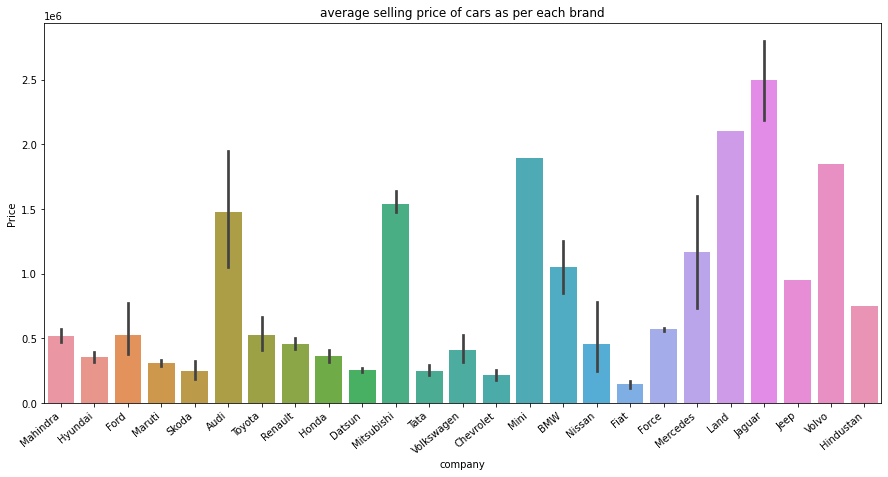

In [53]:
plt.subplots(figsize=(15,7))
ax=sns.barplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title("average selling price of cars as per each brand")
plt.show()

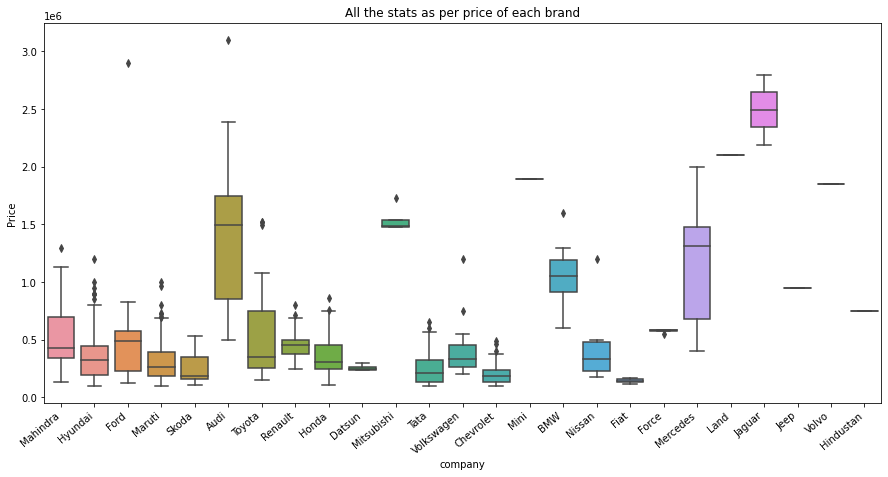

In [54]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title("All the stats as per price of each brand")
plt.show()

In [55]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol


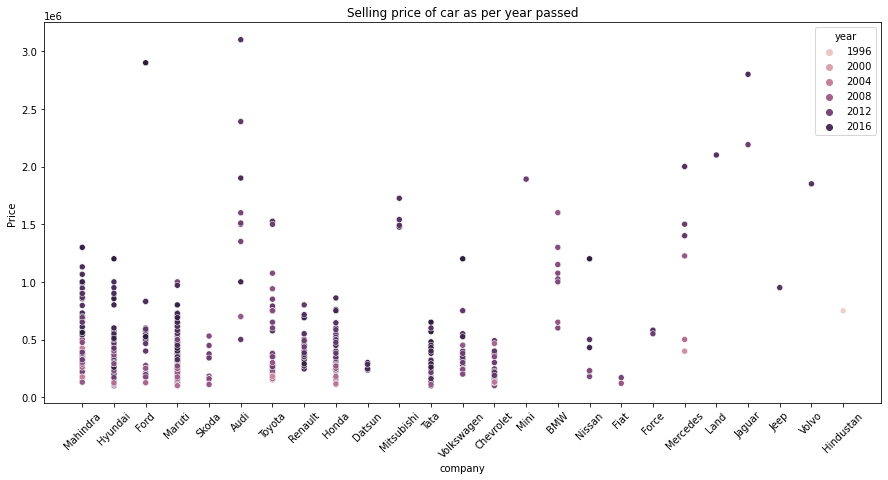

In [56]:
plt.subplots(figsize=(15,7))
sns.scatterplot(df["company"], df["Price"], hue=df["year"])
plt.xticks(rotation=45)
plt.title("Selling price of car as per year passed") # THe newer it is the more price people have paid
plt.show()

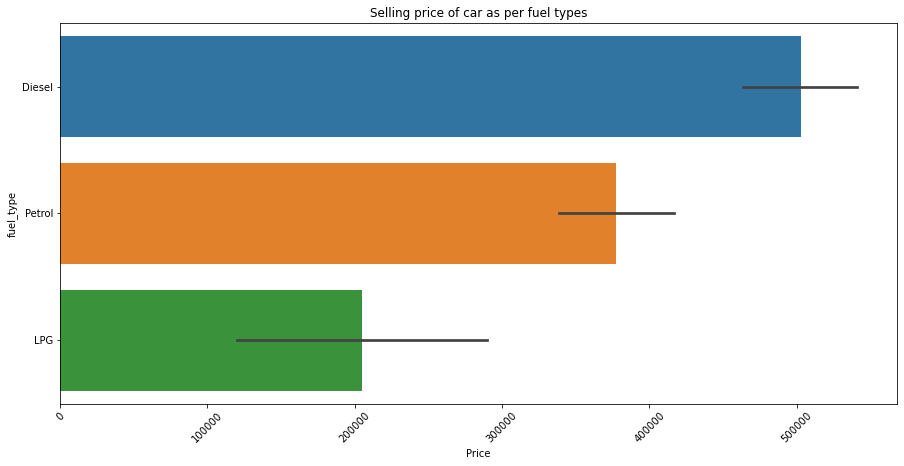

In [57]:
plt.subplots(figsize=(15,7))
sns.barplot(df["Price"], df["fuel_type"])
plt.xticks(rotation=45)
plt.title("Selling price of car as per fuel types")
plt.show()

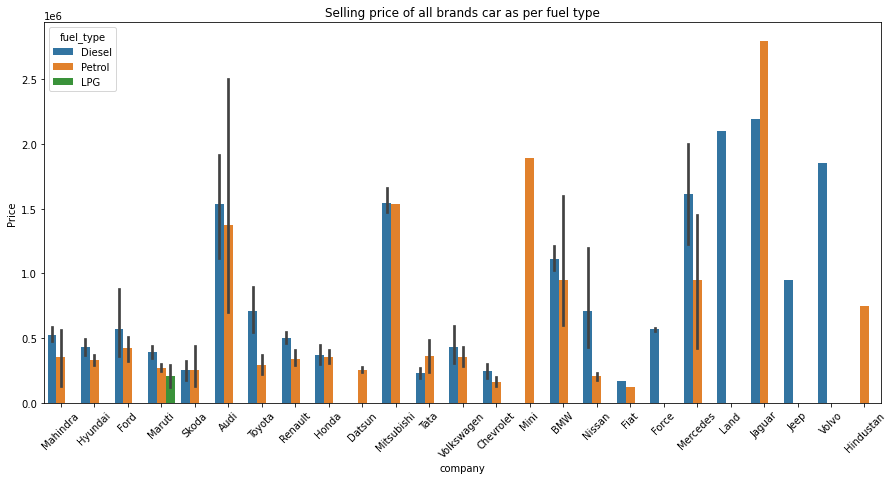

In [58]:
plt.subplots(figsize=(15,7))
sns.barplot(df["company"], df["Price"], hue=df["fuel_type"])
plt.xticks(rotation=45)
plt.title("Selling price of all brands car as per fuel type") # THe newer it is the more price people have paid
plt.show()

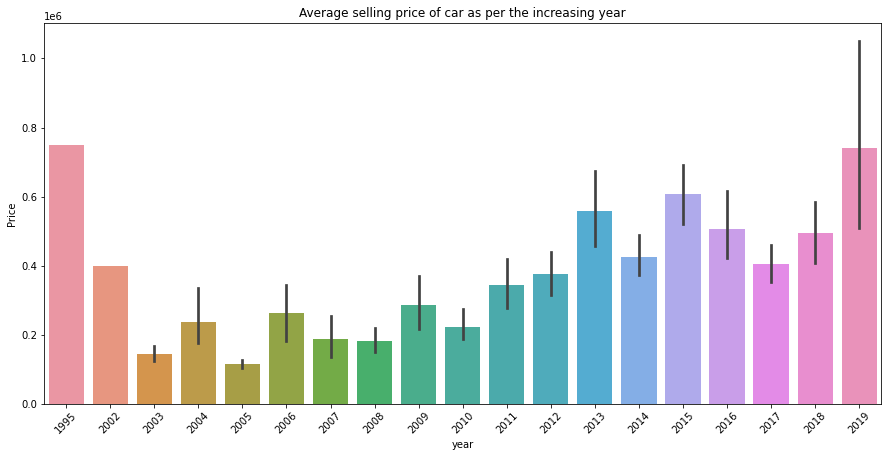

In [59]:
plt.subplots(figsize=(15,7))
sns.barplot(df["year"], df["Price"])
plt.xticks(rotation=45)
plt.title("Average selling price of car as per the increasing year") # It is showing that the vintage car was also priced high
plt.show()

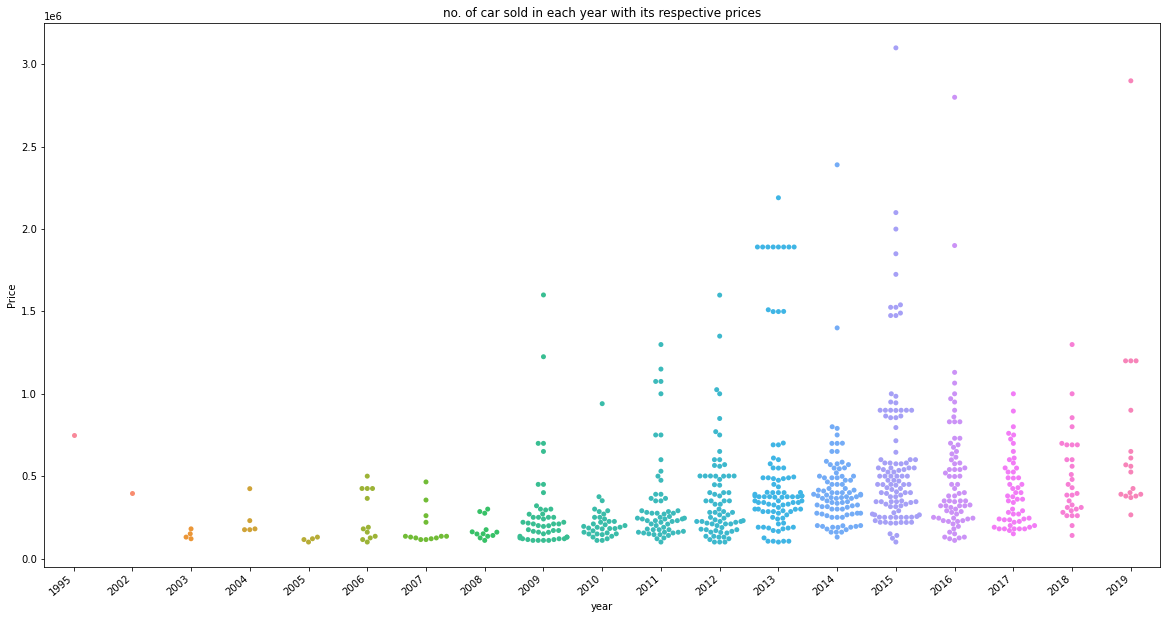

In [60]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title("no. of car sold in each year with its respective prices")
plt.show()

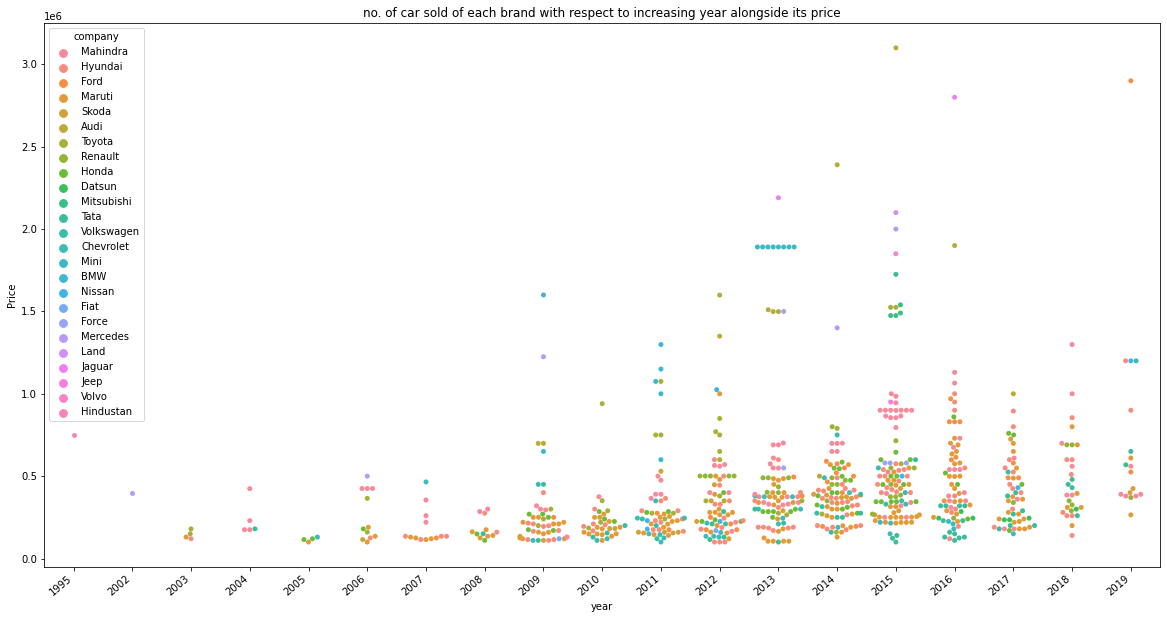

In [61]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price', hue= "company", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title("no. of car sold of each brand with respect to increasing year alongside its price")
plt.show()

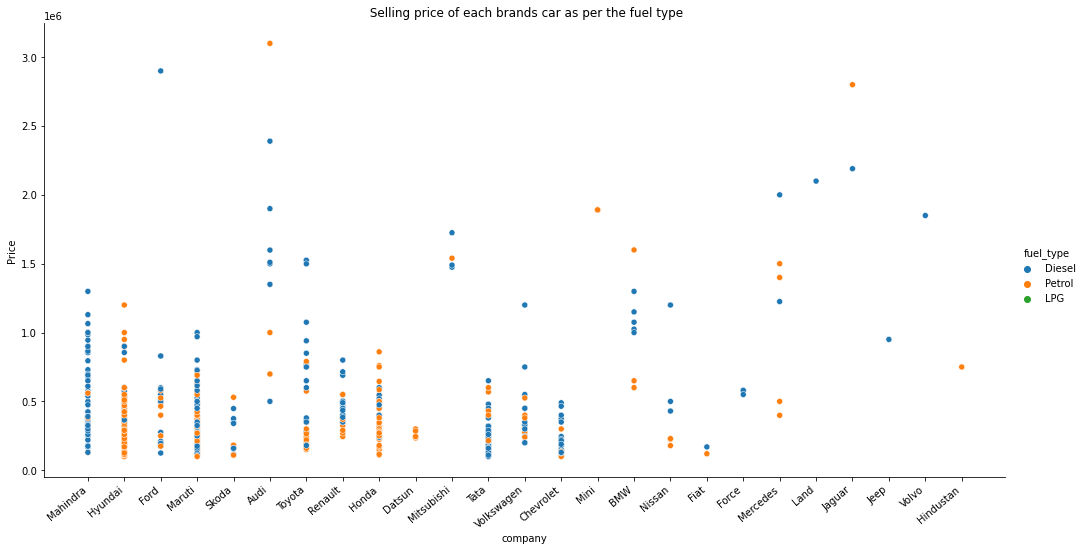

In [62]:
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',height=7,aspect=2)
plt.title(" Selling price of each brands car as per the fuel type")
ax.set_xticklabels(rotation=40,ha='right')

# Model

In [63]:
X = df.drop(columns="Price")
y = df["Price"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
ohe = OneHotEncoder()
ohe.fit(X[["name","company", "fuel_type"]])

OneHotEncoder()

In [66]:
column_trans = make_column_transformer(
                                        (OneHotEncoder(categories=ohe.categories_), ["name","company", "fuel_type"]), 
                                        remainder="passthrough")

In [67]:
lr=LinearRegression()

In [68]:
pipe=make_pipeline(column_trans, lr)

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [70]:
y_pred = pipe.predict(X_test)

In [71]:
r2_score(y_test, y_pred)*100

73.68163860467993

# Finding a random state where my models accuracy is the best

In [72]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [73]:
np.argmax(scores)

195

In [74]:
scores[np.argmax(scores)] # This is the maximum accuracy of model which can be attained if the random stae is set to 195

0.9002140920337719

## Lets check at 195 which is the best model

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=195) # You can also do (random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred) # The result is true

0.9002140920337719

## Prediction with my model in new data

In [76]:
print("The price at which you can sell your car is:", pipe.predict(pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
                           data=[['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']])))


The price at which you can sell your car is: [470367.63481361]


In [77]:
print("The price at which you can sell your car is:", pipe.predict(pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
                           data=[['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Diesel']])))

The price at which you can sell your car is: [555674.80124885]
